In [1]:
#Laplacian 算子
import cv2
import numpy
import matplotlib.pyplot as plt

In [3]:
img=cv2.imread('../images/qipu02.jpg',0)

In [4]:
laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

True

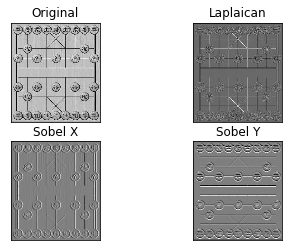

In [6]:
plt.subplot(221),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(laplacian,cmap='gray')
plt.title('Laplaican'),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])
cv2.imwrite('../images/sobelx.jpg',sobelx)

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

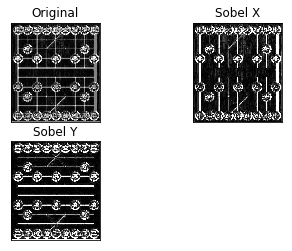

In [6]:
#Sobel
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('../images/qipu02.jpg',0)
x=cv2.Sobel(img,cv2.CV_16S,1,0)
y=cv2.Sobel(img,cv2.CV_16S,0,1)

absX=cv2.convertScaleAbs(x)
absY=cv2.convertScaleAbs(y)
dst=cv2.addWeighted(absX,0.5,absY,0.5,0)
# cv2.imshow('absX',absX)
# cv2.imshow('absY',absY)

# cv2.imshow('result',dst)

# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.subplot(221),plt.imshow(dst,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(absX,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(223),plt.imshow(absY,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])


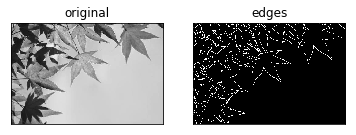

In [20]:
# Canny 边缘检测
img=cv2.imread('../images/20.jpg',2)
edges=cv2.Canny(img,200,240)
plt.subplot(121),plt.imshow(img,'gray')
plt.title('original'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges,'gray')
plt.title('edges'),plt.xticks([]),plt.yticks([])
plt.show()

In [22]:
# 图像金字塔
import cv2 
import numpy as np

def pyramin(img):
    # gause tower
    level =3
    tmp=img.copy()
    pyramin_img=[]
    for i in range(level):
        dst=cv2.pyrdown(tmp)
        pyramin_img.append(dst)
        cv2.imshow('pyramid_img'+str(i),dst)
        tmp=dst.copy()
    return pyramin_img

def lapalian(img):
    #lapalian tower
    pyramid_images=pyramin(img)
    level=len(pyramid_images)
    for i in range(level-1,-1,-1):
        if(i-1)<0:
            exapand=cv2.pyrUp(pyramid_images[i],dstsize=img.shape[:2])
            lpls=cv2.subtract(img,exapand)
            cv2.imshow('lpls_down'+str(i),lpls)
        else:
            exapand=cv2.pyrUp(pyramid_images[i],dstsize=pyramid_images[i-1].shape[:2])
            lpls=cv2.subtract(pyramid_images[i-1],exapand)
            cv2.imshow('lpls_down'+str(i),lpls)
src=cv2.imread('../images/20.jpg',0) 
cv2.imshow('def',src)

cv2.waitKey(0)
cv2.destroyAllWindows()
        